# setup.py

In [1]:
import os
os.system("python setup.py build_ext --inplace")

0

# run_agent.py

In [ ]:
#!/usr/bin/env python
import gym

from pathenv.agent import FoxAgent as Agent

import time

episodes_number = 5
max_steps = 300

if __name__ == '__main__':
    env = gym.make('PathFindingByPixelWithDistanceMapEnv-v1')
    env._configure(vision_range=2, max_steps=max_steps,video_frame_per_second=6, agent_trace='long') #agent_trace can be 'long', 'short' or 'none'
    
    videorec = gym.monitoring.video_recorder.VideoRecorder(env, path='lab.mp4')

    agent = Agent(input_shape=env.observation_space.shape, number_of_actions=env.action_space.n)

    for episode_i in xrange(1, episodes_number + 1):

        observation = env.reset()
        agent.new_episode(env.finish)
        reward, done = 0, False
        for step_i in range(max_steps):
            videorec.capture_frame()
            action = agent.act(observation)
            next_observation, reward, done, _ = env.step(action)
            agent.update_memory(observation, action, reward, next_observation, done)
            observation = next_observation
            if done:
                break

        agent.train_on_memory()
    videorec.close()

[2017-11-20 11:05:29,783] Making new env: PathFindingByPixelWithDistanceMapEnv-v1
[2017-11-20 11:05:30,039] Starting new video recorder writing to lab.mp4


True
[[[ 5.22782634  0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]]]
7
True
[[[-1.          0.          0.          0.          0.        ]
  [ 5.24488225  0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]]]
7
True
[[[ 0.         -1.          0.          0.          0.        ]
  [ 5.27227245 -1.          0.          0.          0.        ]
  [-1.         -1.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]]]
7
False
[[[ 0. 

In [2]:
videorec.close()

In [3]:
import time
import matplotlib.pyplot as plt
%matplotlib inline
def render():
    plt.imshow(env.render(mode='rgb_array'))
    return

In [4]:
#debug
action = agent.act(observation)
env.step(action)
render()

KeyboardInterrupt: 

In [4]:
env.show_map()

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [6]:
videorec.close()

NameError: name 'videorec' is not defined

[2017-10-03 08:22:13,853] Making new env: PathFindingByPixelWithDistanceMapEnv-v1


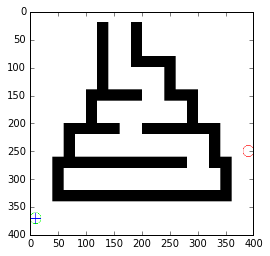

In [3]:
import gym
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('PathFindingByPixelWithDistanceMapEnv-v1')
env._configure()
render = lambda : plt.imshow(env.render(mode='rgb_array'))
env.reset()
render()

1